In [15]:
import pandas as pd
import numpy as np


In [27]:
import pandas as pd

# Use relative path if CSV and notebook are in the same folder
file_path = '/Users/senisanmi/Desktop/untitled folder/diabetes.csv'  # Replace with your actual file name

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [29]:
# Check for any missing values
print(data.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [31]:
# Get descriptive statistics
print(data.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [33]:
# Check data types
print(data.dtypes)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [35]:
data['Outcome'] = data['Outcome'].astype('category')



In [37]:
print(data.dtypes)

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object


In [39]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50       1  
1                     0.351   31       0  
2                     0.672   32       1  
3                     0.167   21       0  
4                     2.288   33       1  


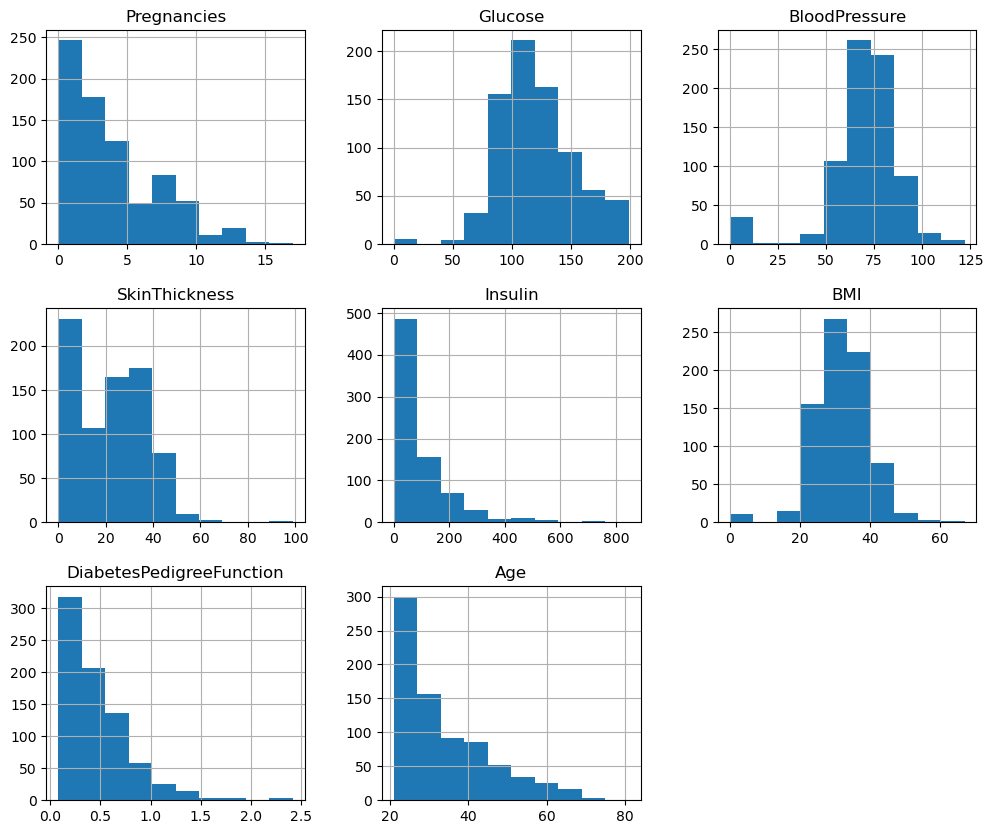

In [41]:
import matplotlib.pyplot as plt

data.hist(figsize=(12, 10))
plt.show()


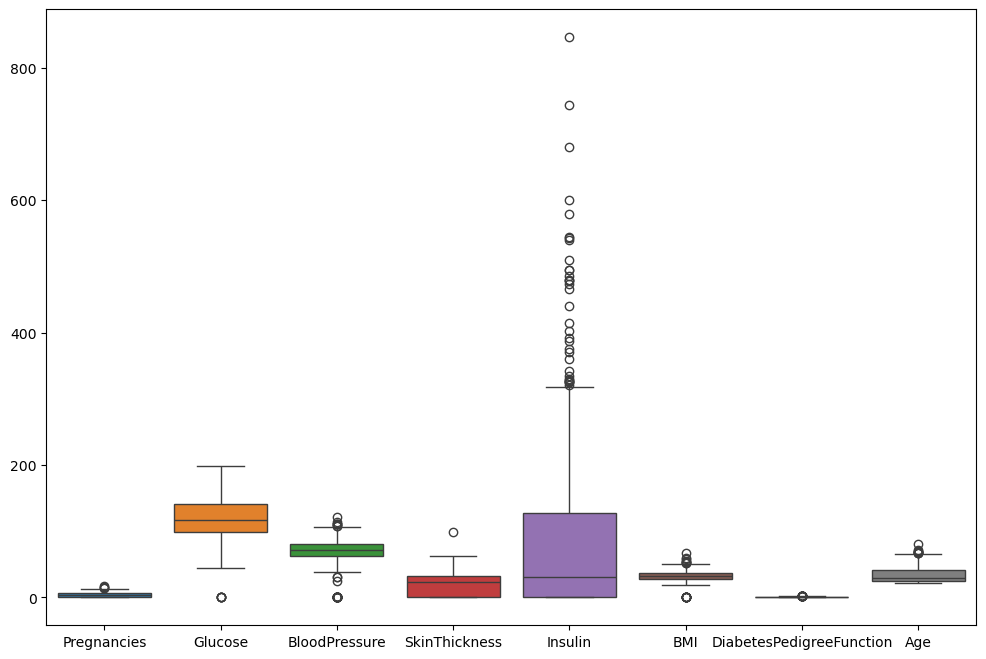

In [45]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.show()



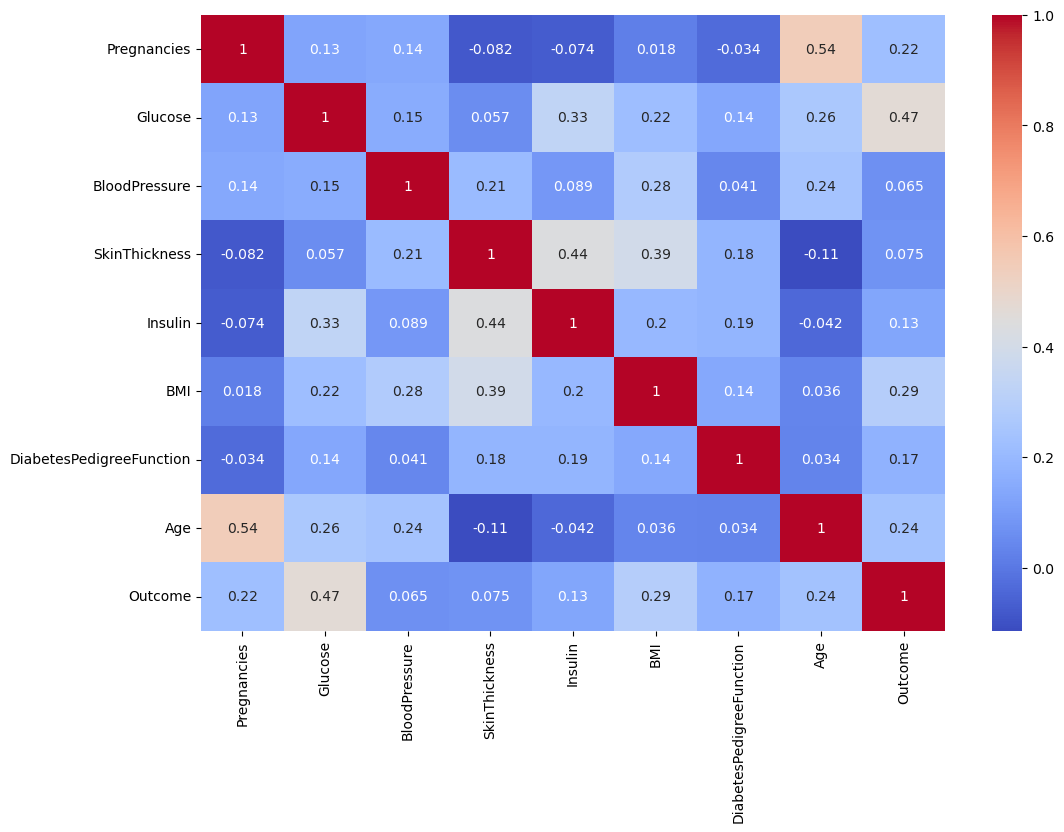

In [47]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


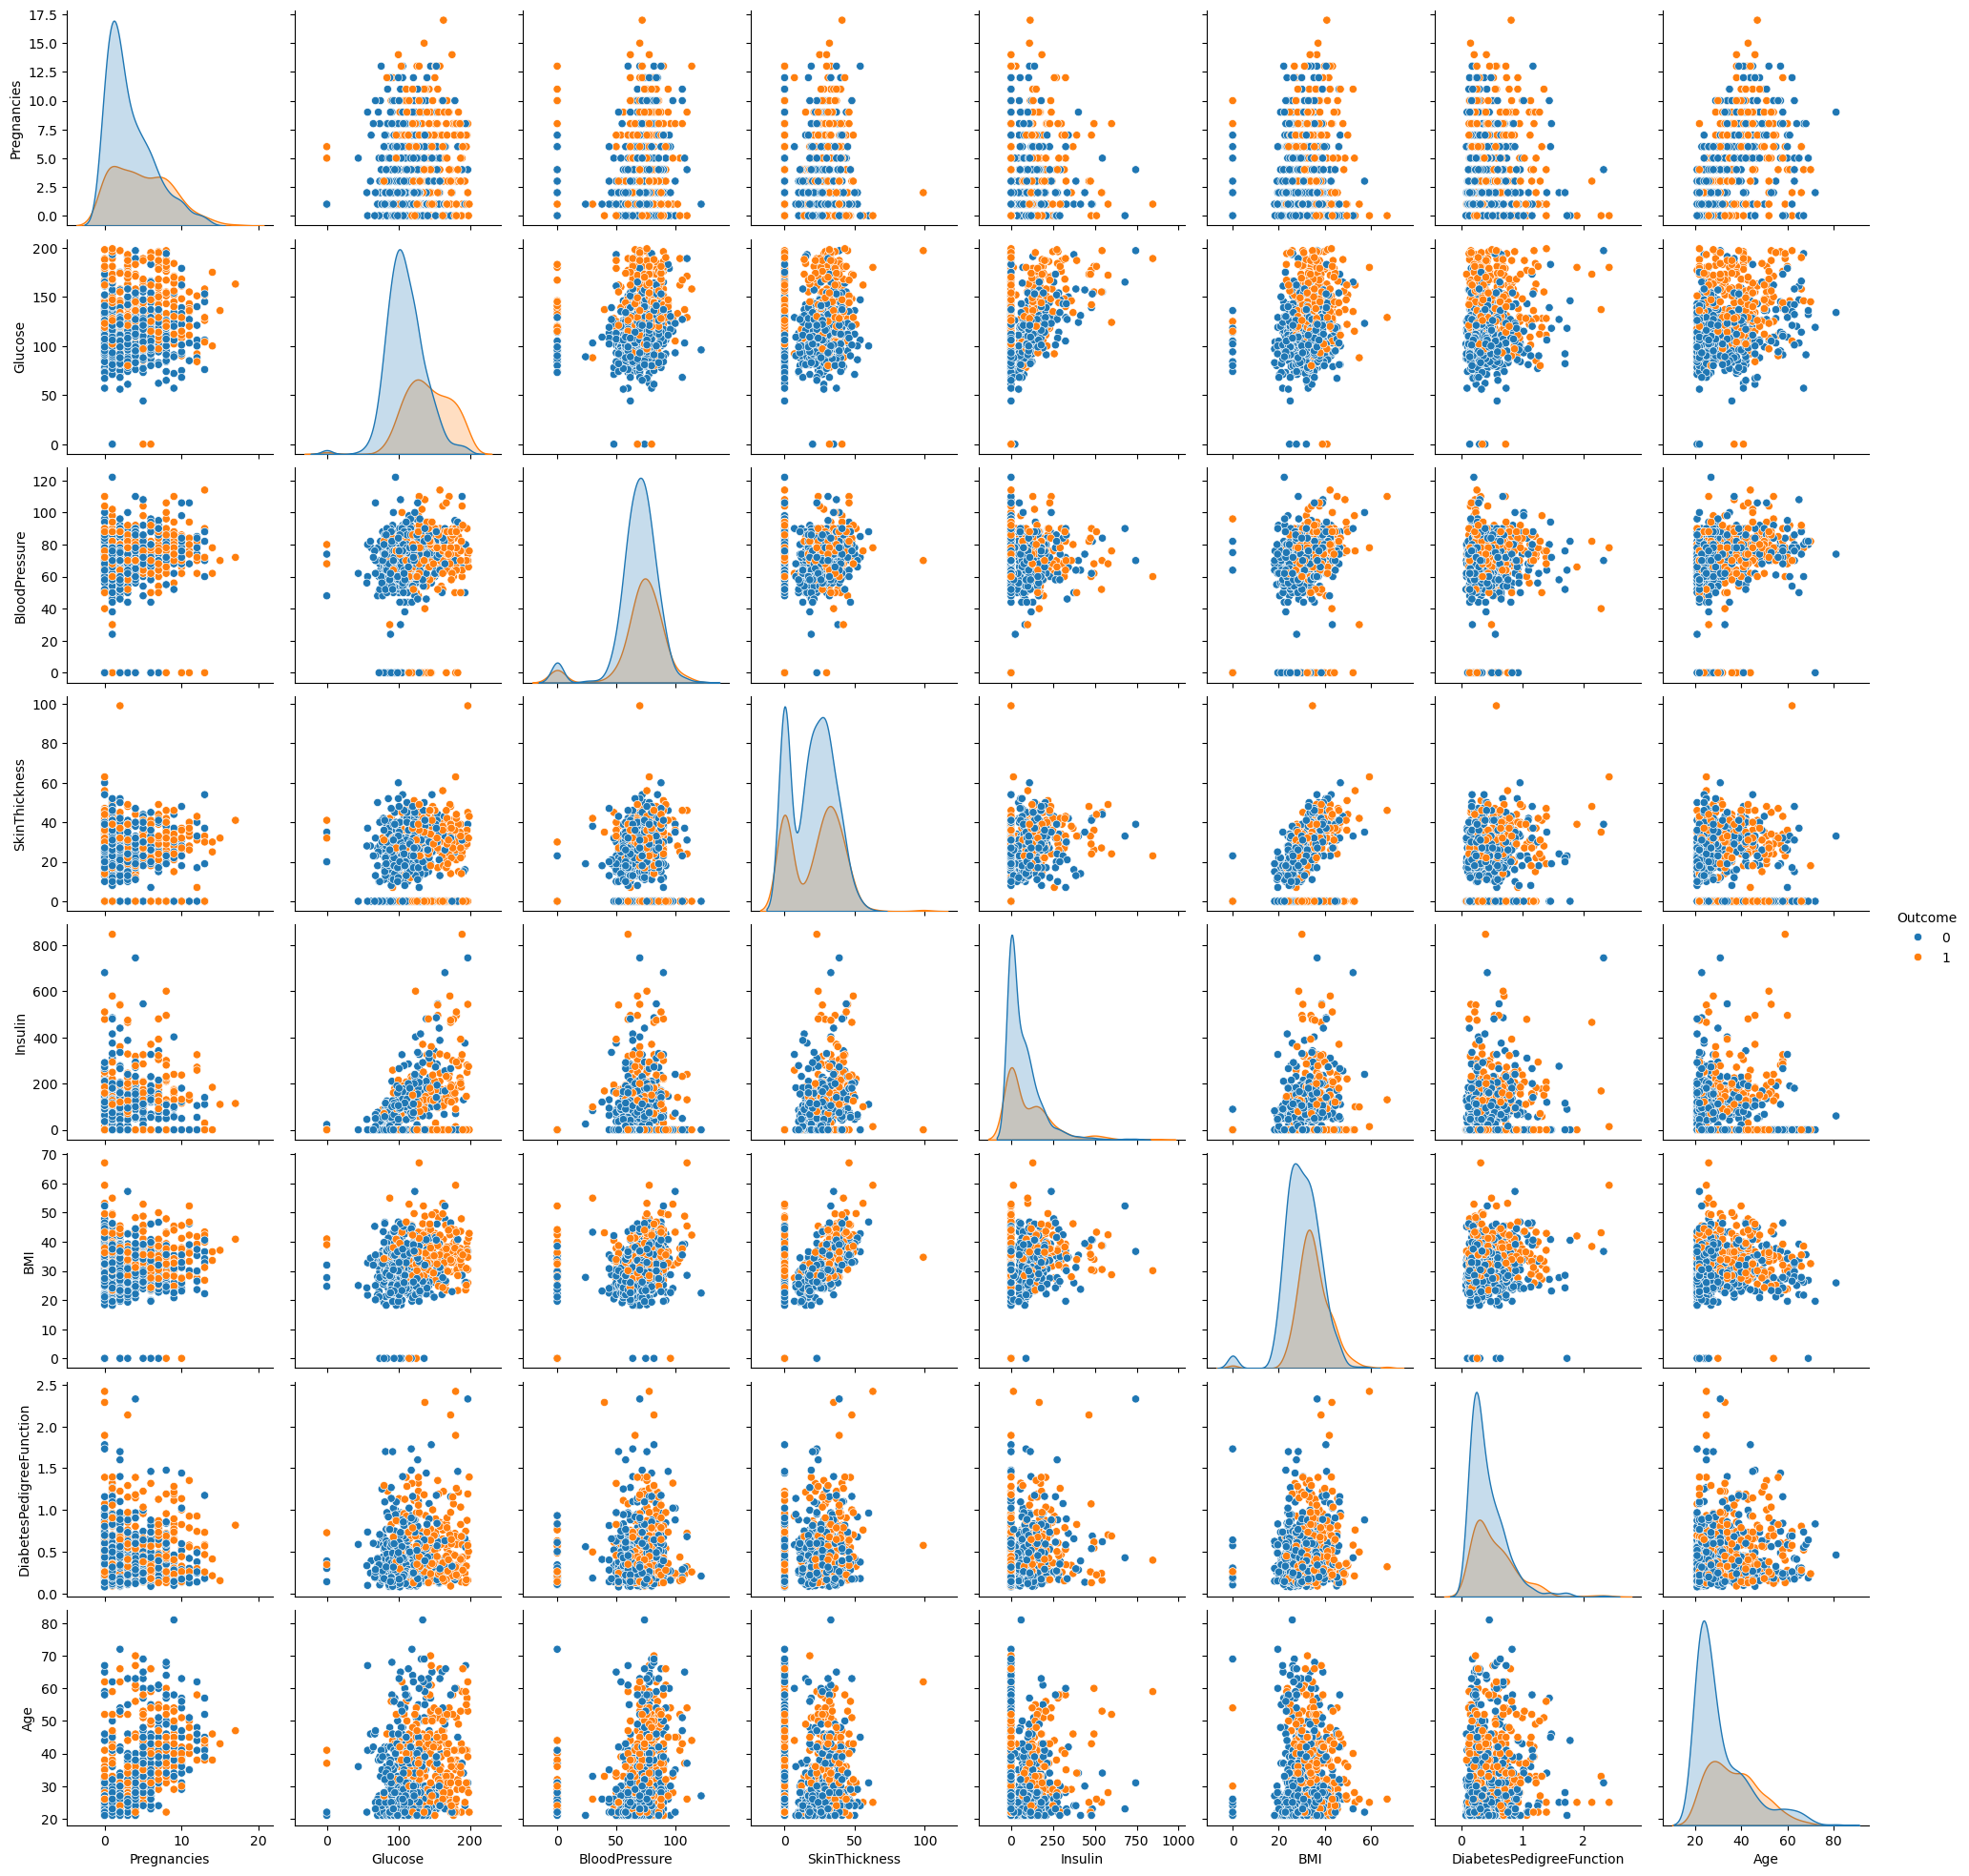

In [49]:
sns.pairplot(data, hue='Outcome')
plt.show()


In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_scaled = scaler.fit_transform(X)


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [55]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


In [57]:
model.fit(X_train, y_train)


LogisticRegression()

In [59]:
y_pred = model.predict(X_test)


In [61]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7359307359307359
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [63]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()


In [65]:
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [67]:
y_pred = model.predict(X_test)


In [69]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.70      0.76       151
           1       0.57      0.75      0.65        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.75      0.71      0.72       231



In [71]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()


In [73]:
model.fit(X_train, y_train)


RandomForestClassifier()

In [75]:
y_pred = model.predict(X_test)


In [77]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7445887445887446
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [83]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate Logistic Regression
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))


Confusion Matrix:
 [[120  31]
 [ 30  50]]
Accuracy: 0.7359307359307359
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [85]:
# Train Decision Tree model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree.predict(X_test)

# Evaluate Decision Tree
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


Confusion Matrix:
 [[109  42]
 [ 26  54]]
Accuracy: 0.7056277056277056
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.56      0.68      0.61        80

    accuracy                           0.71       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231



In [87]:
# Train Random Forest model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

# Make predictions
y_pred_forest = forest.predict(X_test)

# Evaluate Random Forest
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_forest))


Confusion Matrix:
 [[122  29]
 [ 31  49]]
Accuracy: 0.7402597402597403
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80       151
           1       0.63      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [89]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 10, 'n_estimators': 100}


In [93]:
# Assuming X_train is already a NumPy array, remove .values
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, 
                                                   feature_names=X.columns,  # Use X if you want to refer to the original feature names
                                                   class_names=['No Diabetes', 'Diabetes'], 
                                                   mode='classification')

# Explaining the first instance in X_test
explanation = explainer.explain_instance(X_test[0], model.predict_proba)
explanation.show_in_notebook()


In [119]:
import pandas as pd
import numpy as np

# Example of converting X_test back to a DataFrame (if it's not already)
if isinstance(X_test, np.ndarray):
    feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                     'DiabetesPedigreeFunction', 'Age']
    X_test = pd.DataFrame(X_test, columns=feature_names)


In [121]:
import shap

# Create a SHAP explainer for your model (adjust depending on model type)
explainer = shap.TreeExplainer(model)

# Generate SHAP values for the test dataset
shap_values = explainer.shap_values(X_test)


In [125]:
# Create a SHAP explainer for your model (adjust depending on model type)
explainer = shap.TreeExplainer(model)


In [127]:
# Generate SHAP values for the test dataset
shap_values = explainer.shap_values(X_test)


In [129]:
shap.initjs()


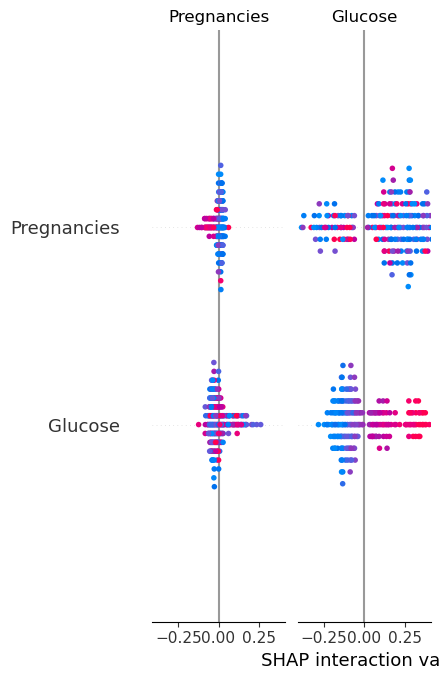

In [131]:
# Visualize SHAP values with a summary plot
shap.summary_plot(shap_values, X_test)
